In [1]:
import tensorflow as tf
print(tf.__version__)

2.2.0


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
from keras.datasets import cifar10
from keras.utils import to_categorical

In [5]:
# load dataset 
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

In [6]:
print('X_train: ', X_train.shape, 'Y_train: ', Y_train.shape)
print('X_test: ', X_test.shape, 'Y_test: ', Y_test.shape) 

X_train:  (50000, 32, 32, 3) Y_train:  (50000, 1)
X_test:  (10000, 32, 32, 3) Y_test:  (10000, 1)


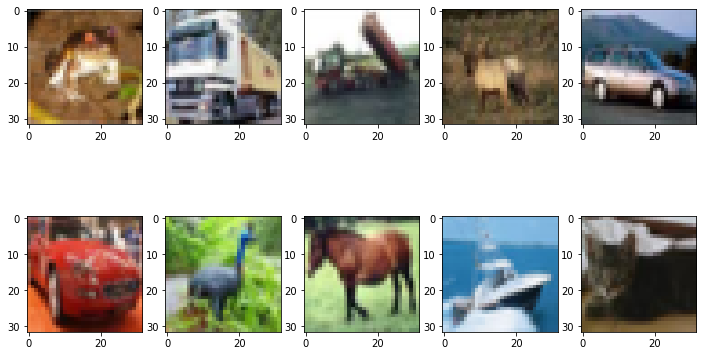

In [40]:
# plot first few images
fig = plt.figure(figsize=(12,7))
for i in range(10):
	# define subplot
	plt.subplot(2, 5, i+1)
	# plot raw pixel data
	plt.imshow(X_train[i])
# show the figure
plt.show()

In [23]:
Y_train[0]

array([6], dtype=uint8)

## Loading the dataset

In [43]:
def load_dataset():
	# load dataset
	(X_train, Y_train), (X_train, Y_test) = cifar10.load_data()
	# one hot encoding the target values
	Y_train = to_categorical(Y_train)
	Y_test = to_categorical(Y_test)
	return X_train, Y_train, X_test, Y_test

##Rescaling images

In [44]:
def normalize_pixel(train_data, test_data):
  # converting into floating type
  train_normalized = train_data.astype('float32')
  test_normalized = test_data.astype('float32')
  # rescaling images
  train_normalized = train_normalized / 255.0
  test_normalized = test_normalized / 255.0
  return train_normalized, test_normalized

In [46]:
# plot diagnostic learning curves
def summarize_diagnostics(history):
	# plot loss
	pyplot.subplot(211)
	pyplot.title('Cross Entropy Loss')
	pyplot.plot(history.history['loss'], color='blue', label='train')
	pyplot.plot(history.history['val_loss'], color='orange', label='test')
	# plot accuracy
	pyplot.subplot(212)
	pyplot.title('Classification Accuracy')
	pyplot.plot(history.history['accuracy'], color='blue', label='train')
	pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
	pyplot.close()